In [1]:


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV, Lasso, LassoCV,ElasticNetCV
import seaborn as sns # reg plot
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
import numpy as np # array
import pandas as pd # csv
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale # standardizing
import sklearn.linear_model as lm #model
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,roc_curve,roc_auc_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score,GridSearchCV




In [2]:
#LOADING AND SETTING THE DATASET

In [3]:
pd.set_option('display.max_rows', 754)

In [4]:
df = pd.read_csv("pd_speech_features.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


In [5]:
df.columns = df.iloc[0]
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


In [6]:
df = df.drop([0],0)
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13152\3363494812.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop([0],0)


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [7]:
pd.set_option('display.max_rows', 757)
df.isna().sum()

0
id                                0
gender                            0
PPE                               0
DFA                               0
RPDE                              0
numPulses                         0
numPeriodsPulses                  0
meanPeriodPulses                  0
stdDevPeriodPulses                0
locPctJitter                      0
locAbsJitter                      0
rapJitter                         0
ppq5Jitter                        0
ddpJitter                         0
locShimmer                        0
locDbShimmer                      0
apq3Shimmer                       0
apq5Shimmer                       0
apq11Shimmer                      0
ddaShimmer                        0
meanAutoCorrHarmonicity           0
meanNoiseToHarmHarmonicity        0
meanHarmToNoiseHarmonicity        0
minIntensity                      0
maxIntensity                      0
meanIntensity                     0
f1                                0
f2                        

In [8]:
#CHECKING IF DATASET LABEL VALUE IS IMBALANCED OR NOT 

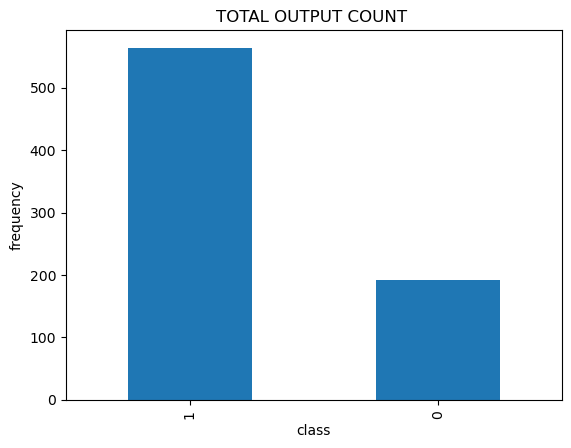

<Figure size 640x100 with 0 Axes>

In [8]:
count = pd.value_counts(df["class"], sort = True)
count.plot(kind = "bar")
plt.title("TOTAL OUTPUT COUNT ")
plt.xlabel("class")
plt.ylabel("frequency")
plt.figure().set_figheight(1)
plt.show()
 

In [13]:
X = df.iloc[:,0:754]


In [14]:
Y = df.iloc[:,754]
 

In [15]:
# TAKING 60/40 RATIO FOR SAMPLING

In [16]:
from imblearn.over_sampling import RandomOverSampler
Sample = RandomOverSampler(sampling_strategy = 0.6)
X_sam,Y_sam=Sample.fit_resample(X,Y)


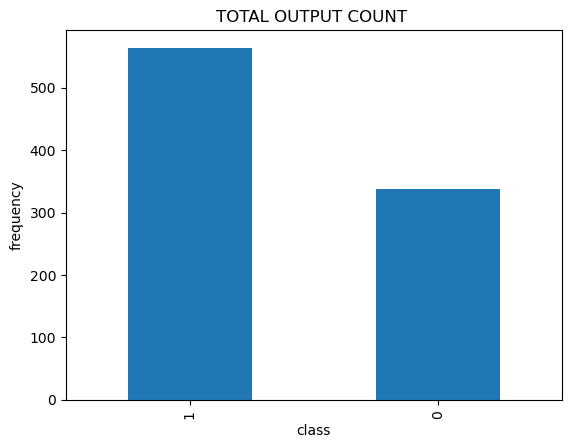

<Figure size 640x100 with 0 Axes>

In [17]:
count = pd.value_counts(Y_sam,  sort = True)

count.plot(kind = "bar")
plt.title("TOTAL OUTPUT COUNT ")
plt.xlabel("class")
plt.ylabel("frequency")
plt.figure().set_figheight(1)
plt.show()
 

In [14]:
# ELASTICNET 

In [18]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [19]:
parameters = [{"l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9]}]


In [20]:
classifier  = LogisticRegression()

In [21]:
#USING GRIDSEARCH CV FOR BEST L1 RATIO

In [22]:
gridSearch = GridSearchCV(estimator = classifier,scoring = "accuracy", n_jobs = -1,param_grid = parameters,cv = 10)
gridSearch.fit(X_sam,Y_sam)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8,
                                       0.9]}],
             scoring='accuracy')

In [172]:
print(gridSearch.best_params_)

{'l1_ratio': 0.1}


In [173]:
Elastic = ElasticNetCV(alphas = alphas, l1_ratio = 0.1)
Elastic.fit(X_sam,Y_sam)


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.843e+00, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.535e+01, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.842e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.841e+01, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.743e+01, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.647e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.309e+01, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.228e+01, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.147e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+01, tolerance: 1.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+01, tolerance: 1.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.887e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.959e+01, tolerance: 1.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.881e+01, tolerance: 1.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.804e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.490e+01, tolerance: 1.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.406e+01, tolerance: 1.760e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.324e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.511e+01, tolerance: 1.743e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.759e+01, tolerance: 1.743e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.909e-01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.568e+01, tolerance: 1.743e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.444e+01, tolerance: 1.743e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.318e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.260e+01, tolerance: 1.743e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.193e+01, tolerance: 1.743e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.121e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.377e+01, tolerance: 1.721e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.469e+01, tolerance: 1.721e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.517e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.277e+01, tolerance: 1.721e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.170e+01, tolerance: 1.721e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.065e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.862e+01, tolerance: 1.721e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.779e+01, tolerance: 1.721e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.696e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.197e+01, tolerance: 1.321e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.060e+01, tolerance: 1.321e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.569e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.716e+01, tolerance: 1.321e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.645e+01, tolerance: 1.321e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.571e+01, tolerance: 

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.365e+01, tolerance: 1.321e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.310e+01, tolerance: 1.321e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.258e+01, tolerance: 

ElasticNetCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.424017...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
             l1_ratio=0.1)

In [174]:
pd.Series(Elastic.coef_, index = X_sam.columns )

0
id                               -0.000000e+00
gender                            0.000000e+00
PPE                              -0.000000e+00
DFA                               0.000000e+00
RPDE                              0.000000e+00
numPulses                         0.000000e+00
numPeriodsPulses                  0.000000e+00
meanPeriodPulses                 -0.000000e+00
stdDevPeriodPulses                0.000000e+00
locPctJitter                      0.000000e+00
locAbsJitter                      0.000000e+00
rapJitter                         0.000000e+00
ppq5Jitter                        0.000000e+00
ddpJitter                         0.000000e+00
locShimmer                        0.000000e+00
locDbShimmer                      0.000000e+00
apq3Shimmer                       0.000000e+00
apq5Shimmer                       0.000000e+00
apq11Shimmer                      0.000000e+00
ddaShimmer                        0.000000e+00
meanAutoCorrHarmonicity          -0.000000e+00
meanNoiseTo

In [114]:
# TAKING THE USEFUL VARIABLES

In [115]:
# VIF

In [23]:
X_sam[["b4","GNE_SNR_SEO","det_entropy_shannon_1_coef","det_entropy_shannon_2_coef","det_entropy_shannon_3_coef","det_entropy_shannon_4_coef","det_entropy_shannon_5_coef","det_entropy_shannon_6_coef","det_entropy_shannon_7_coef","det_entropy_shannon_8_coef","det_entropy_shannon_9_coef","det_entropy_shannon_10_coef","det_TKEO_std_6_coef","det_TKEO_std_9_coef","det_TKEO_std_10_coef","app_entropy_shannon_1_coef","app_entropy_shannon_2_coef","app_entropy_shannon_3_coef","app_entropy_shannon_4_coef","app_entropy_shannon_5_coef","app_entropy_shannon_6_coef","app_entropy_shannon_7_coef","app_entropy_shannon_8_coef","app_entropy_shannon_9_coef","app_entropy_shannon_10_coef","app_det_TKEO_mean_6_coef","app_det_TKEO_mean_7_coef","app_det_TKEO_mean_8_coef","app_det_TKEO_mean_9_coef","app_det_TKEO_mean_10_coef","app_TKEO_std_3_coef","app_TKEO_std_4_coef","app_TKEO_std_5_coef","app_TKEO_std_6_coef","app_TKEO_std_7_coef","app_TKEO_std_8_coef","app_TKEO_std_9_coef","app_TKEO_std_10_coef","app_LT_entropy_shannon_9_coef","app_LT_entropy_shannon_10_coef","tqwt_entropy_log_dec_1","tqwt_entropy_log_dec_2","tqwt_entropy_log_dec_3","tqwt_entropy_log_dec_4","tqwt_entropy_log_dec_5","tqwt_entropy_log_dec_6","tqwt_entropy_log_dec_7","tqwt_entropy_log_dec_8","tqwt_entropy_log_dec_9","tqwt_entropy_log_dec_10","tqwt_entropy_log_dec_11","tqwt_entropy_log_dec_12","tqwt_entropy_log_dec_13","tqwt_entropy_log_dec_16","tqwt_entropy_log_dec_18","tqwt_entropy_log_dec_20","tqwt_entropy_log_dec_21","tqwt_entropy_log_dec_22","tqwt_entropy_log_dec_23","tqwt_entropy_log_dec_24","tqwt_entropy_log_dec_25","tqwt_entropy_log_dec_26","tqwt_entropy_log_dec_27","tqwt_entropy_log_dec_28","tqwt_entropy_log_dec_34","tqwt_kurtosisValue_dec_1"]] = scale(X_sam[["b4","GNE_SNR_SEO","det_entropy_shannon_1_coef","det_entropy_shannon_2_coef","det_entropy_shannon_3_coef","det_entropy_shannon_4_coef","det_entropy_shannon_5_coef","det_entropy_shannon_6_coef","det_entropy_shannon_7_coef","det_entropy_shannon_8_coef","det_entropy_shannon_9_coef","det_entropy_shannon_10_coef","det_TKEO_std_6_coef","det_TKEO_std_9_coef","det_TKEO_std_10_coef","app_entropy_shannon_1_coef","app_entropy_shannon_2_coef","app_entropy_shannon_3_coef","app_entropy_shannon_4_coef","app_entropy_shannon_5_coef","app_entropy_shannon_6_coef","app_entropy_shannon_7_coef","app_entropy_shannon_8_coef","app_entropy_shannon_9_coef","app_entropy_shannon_10_coef","app_det_TKEO_mean_6_coef","app_det_TKEO_mean_7_coef","app_det_TKEO_mean_8_coef","app_det_TKEO_mean_9_coef","app_det_TKEO_mean_10_coef","app_TKEO_std_3_coef","app_TKEO_std_4_coef","app_TKEO_std_5_coef","app_TKEO_std_6_coef","app_TKEO_std_7_coef","app_TKEO_std_8_coef","app_TKEO_std_9_coef","app_TKEO_std_10_coef","app_LT_entropy_shannon_9_coef","app_LT_entropy_shannon_10_coef","tqwt_entropy_log_dec_1","tqwt_entropy_log_dec_2","tqwt_entropy_log_dec_3","tqwt_entropy_log_dec_4","tqwt_entropy_log_dec_5","tqwt_entropy_log_dec_6","tqwt_entropy_log_dec_7","tqwt_entropy_log_dec_8","tqwt_entropy_log_dec_9","tqwt_entropy_log_dec_10","tqwt_entropy_log_dec_11","tqwt_entropy_log_dec_12","tqwt_entropy_log_dec_13","tqwt_entropy_log_dec_16","tqwt_entropy_log_dec_18","tqwt_entropy_log_dec_20","tqwt_entropy_log_dec_21","tqwt_entropy_log_dec_22","tqwt_entropy_log_dec_23","tqwt_entropy_log_dec_24","tqwt_entropy_log_dec_25","tqwt_entropy_log_dec_26","tqwt_entropy_log_dec_27","tqwt_entropy_log_dec_28","tqwt_entropy_log_dec_34","tqwt_kurtosisValue_dec_1"]],with_mean = True, with_std = True)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [24]:
Xt = X_sam[["b4","GNE_SNR_SEO","det_entropy_shannon_1_coef","det_entropy_shannon_2_coef","det_entropy_shannon_3_coef","det_entropy_shannon_4_coef","det_entropy_shannon_5_coef","det_entropy_shannon_6_coef","det_entropy_shannon_7_coef","det_entropy_shannon_8_coef","det_entropy_shannon_9_coef","det_entropy_shannon_10_coef","det_TKEO_std_6_coef","det_TKEO_std_9_coef","det_TKEO_std_10_coef","app_entropy_shannon_1_coef","app_entropy_shannon_2_coef","app_entropy_shannon_3_coef","app_entropy_shannon_4_coef","app_entropy_shannon_5_coef","app_entropy_shannon_6_coef","app_entropy_shannon_7_coef","app_entropy_shannon_8_coef","app_entropy_shannon_9_coef","app_entropy_shannon_10_coef","app_det_TKEO_mean_6_coef","app_det_TKEO_mean_7_coef","app_det_TKEO_mean_8_coef","app_det_TKEO_mean_9_coef","app_det_TKEO_mean_10_coef","app_TKEO_std_3_coef","app_TKEO_std_4_coef","app_TKEO_std_5_coef","app_TKEO_std_6_coef","app_TKEO_std_7_coef","app_TKEO_std_8_coef","app_TKEO_std_9_coef","app_TKEO_std_10_coef","app_LT_entropy_shannon_9_coef","app_LT_entropy_shannon_10_coef","tqwt_entropy_log_dec_1","tqwt_entropy_log_dec_2","tqwt_entropy_log_dec_3","tqwt_entropy_log_dec_4","tqwt_entropy_log_dec_5","tqwt_entropy_log_dec_6","tqwt_entropy_log_dec_7","tqwt_entropy_log_dec_8","tqwt_entropy_log_dec_9","tqwt_entropy_log_dec_10","tqwt_entropy_log_dec_11","tqwt_entropy_log_dec_12","tqwt_entropy_log_dec_13","tqwt_entropy_log_dec_16","tqwt_entropy_log_dec_18","tqwt_entropy_log_dec_20","tqwt_entropy_log_dec_21","tqwt_entropy_log_dec_22","tqwt_entropy_log_dec_23","tqwt_entropy_log_dec_24","tqwt_entropy_log_dec_25","tqwt_entropy_log_dec_26","tqwt_entropy_log_dec_27","tqwt_entropy_log_dec_28","tqwt_entropy_log_dec_34","tqwt_kurtosisValue_dec_1"]]

In [25]:
X = add_constant(Xt)
X

,const,b4,GNE_SNR_SEO,det_entropy_shannon_1_coef,det_entropy_shannon_2_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_6_coef,det_entropy_shannon_7_coef,...,tqwt_entropy_log_dec_21,tqwt_entropy_log_dec_22,tqwt_entropy_log_dec_23,tqwt_entropy_log_dec_24,tqwt_entropy_log_dec_25,tqwt_entropy_log_dec_26,tqwt_entropy_log_dec_27,tqwt_entropy_log_dec_28,tqwt_entropy_log_dec_34,tqwt_kurtosisValue_dec_1
0,1.0,-0.177446,-1.151726,0.108541,0.112513,0.111690,0.190598,0.174654,0.191758,0.131740,...,-0.565376,0.295829,0.651445,0.147221,-0.359120,0.566587,1.199378,1.518461,-0.770369,-0.283812
1,1.0,-0.438390,-0.864884,0.108542,0.112514,0.111673,0.190539,0.175497,0.191565,0.132039,...,-1.056966,-0.121696,0.370091,-0.033106,-0.565949,0.454079,1.132695,1.501075,-0.762327,2.317473
2,1.0,-0.634361,-0.939765,0.108541,0.112513,0.111687,0.190507,0.175740,0.191578,0.132054,...,-1.397180,-1.078488,-0.485164,-0.723200,-0.828176,0.258529,0.952416,1.332062,-0.692810,-0.295103
3,1.0,0.011964,0.990131,-0.035323,-0.266315,-0.312462,-0.647589,-1.271950,-1.751271,-2.246051,...,0.874971,0.529415,0.979522,1.488883,1.271064,0.969317,0.186433,0.922216,0.851710,-0.124745
4,1.0,-0.195044,0.783856,-0.062449,-0.122268,-0.176480,-1.270840,-0.643020,-1.255547,-2.423094,...,0.905387,0.499416,0.936633,1.487855,1.358317,1.030685,0.096750,0.635574,0.717370,-0.294264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,1.0,0.634784,0.781599,0.108546,0.112508,0.110684,0.187004,0.161630,0.184303,0.114932,...,-0.229799,0.614838,1.321632,1.088846,0.325419,-1.435969,-1.372985,-1.124313,0.873597,-0.195965
898,1.0,-0.524621,-0.580042,0.108543,0.112517,0.111696,0.190369,0.175167,0.189777,0.131354,...,-1.089246,-0.086456,0.155890,-0.515698,-2.037646,-2.091357,-1.563806,-1.049075,0.048554,-0.215502
899,1.0,-0.473392,1.477161,0.108548,0.112516,0.111679,0.190410,0.174232,0.188910,0.131388,...,-0.462199,0.607384,1.210345,0.967538,0.039582,-1.761980,-1.268120,-0.720766,0.322381,-0.256199
900,1.0,-0.432932,1.126633,0.108546,0.112523,0.111597,0.188016,0.170439,0.189362,0.131239,...,0.511561,0.042989,-0.113227,0.673125,0.815818,0.704078,-0.291689,-1.127892,-0.183574,-0.293262


In [183]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]

In [184]:
vif_park

,feature,VIF
0,const,1.000000e+00
1,b4,1.112441e+00
2,GNE_SNR_SEO,1.302539e+00
3,det_entropy_shannon_1_coef,2.580239e+01
4,det_entropy_shannon_2_coef,1.713690e+02
5,det_entropy_shannon_3_coef,1.675515e+02
6,det_entropy_shannon_4_coef,7.261427e+01
7,det_entropy_shannon_5_coef,2.501074e+01
8,det_entropy_shannon_6_coef,1.998349e+02
9,det_entropy_shannon_7_coef,8.849131e+01


In [185]:
X = X.drop(["app_entropy_shannon_9_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3870651383.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_9_coef"],1)


In [186]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]

In [187]:
vif_park

,feature,VIF
0,const,1.000000e+00
1,b4,1.111593e+00
2,GNE_SNR_SEO,1.301284e+00
3,det_entropy_shannon_1_coef,2.507924e+01
4,det_entropy_shannon_2_coef,1.710321e+02
5,det_entropy_shannon_3_coef,1.668470e+02
6,det_entropy_shannon_4_coef,6.963885e+01
7,det_entropy_shannon_5_coef,2.458965e+01
8,det_entropy_shannon_6_coef,1.994499e+02
9,det_entropy_shannon_7_coef,8.812547e+01


In [188]:
X = X.drop(["app_LT_entropy_shannon_9_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\248170403.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_LT_entropy_shannon_9_coef"],1)


In [189]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000e+00
1,b4,1.109824e+00
2,GNE_SNR_SEO,1.301283e+00
3,det_entropy_shannon_1_coef,2.453376e+01
4,det_entropy_shannon_2_coef,1.671656e+02
5,det_entropy_shannon_3_coef,1.658956e+02
6,det_entropy_shannon_4_coef,6.801807e+01
7,det_entropy_shannon_5_coef,2.424065e+01
8,det_entropy_shannon_6_coef,1.982842e+02
9,det_entropy_shannon_7_coef,8.777886e+01


In [ ]:
X = X.drop(["app_entropy_shannon_10_coef"],1)

In [190]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000e+00
1,b4,1.109824e+00
2,GNE_SNR_SEO,1.301283e+00
3,det_entropy_shannon_1_coef,2.453376e+01
4,det_entropy_shannon_2_coef,1.671656e+02
5,det_entropy_shannon_3_coef,1.658956e+02
6,det_entropy_shannon_4_coef,6.801807e+01
7,det_entropy_shannon_5_coef,2.424065e+01
8,det_entropy_shannon_6_coef,1.982842e+02
9,det_entropy_shannon_7_coef,8.777886e+01


In [191]:
X = X.drop(["app_entropy_shannon_10_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\249442165.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_10_coef"],1)


In [192]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000e+00
1,b4,1.109641e+00
2,GNE_SNR_SEO,1.289910e+00
3,det_entropy_shannon_1_coef,2.452528e+01
4,det_entropy_shannon_2_coef,1.641948e+02
5,det_entropy_shannon_3_coef,1.658510e+02
6,det_entropy_shannon_4_coef,6.635281e+01
7,det_entropy_shannon_5_coef,2.423075e+01
8,det_entropy_shannon_6_coef,1.965480e+02
9,det_entropy_shannon_7_coef,8.236085e+01


In [193]:
X = X.drop(["app_det_TKEO_mean_10_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\162019036.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_det_TKEO_mean_10_coef"],1)


In [194]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000e+00
1,b4,1.109571e+00
2,GNE_SNR_SEO,1.289678e+00
3,det_entropy_shannon_1_coef,2.425757e+01
4,det_entropy_shannon_2_coef,1.627464e+02
5,det_entropy_shannon_3_coef,1.638892e+02
6,det_entropy_shannon_4_coef,6.541579e+01
7,det_entropy_shannon_5_coef,2.422839e+01
8,det_entropy_shannon_6_coef,1.907171e+02
9,det_entropy_shannon_7_coef,8.209507e+01


In [195]:
X = X.drop(["app_det_TKEO_mean_9_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1102900465.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_det_TKEO_mean_9_coef"],1)


In [196]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000e+00
1,b4,1.109380e+00
2,GNE_SNR_SEO,1.289034e+00
3,det_entropy_shannon_1_coef,2.380201e+01
4,det_entropy_shannon_2_coef,1.528273e+02
5,det_entropy_shannon_3_coef,1.562675e+02
6,det_entropy_shannon_4_coef,6.427521e+01
7,det_entropy_shannon_5_coef,2.402450e+01
8,det_entropy_shannon_6_coef,1.849171e+02
9,det_entropy_shannon_7_coef,6.606913e+01


In [197]:
X = X.drop(["app_entropy_shannon_2_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1290871801.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_2_coef"],1)


In [198]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000e+00
1,b4,1.106764e+00
2,GNE_SNR_SEO,1.287129e+00
3,det_entropy_shannon_1_coef,2.178305e+01
4,det_entropy_shannon_2_coef,1.316522e+02
5,det_entropy_shannon_3_coef,5.418022e+01
6,det_entropy_shannon_4_coef,6.123287e+01
7,det_entropy_shannon_5_coef,2.397963e+01
8,det_entropy_shannon_6_coef,1.807848e+02
9,det_entropy_shannon_7_coef,6.461418e+01


In [199]:
X = X.drop(["app_entropy_shannon_4_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1077863333.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_4_coef"],1)


In [200]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.106263
2,GNE_SNR_SEO,1.282619
3,det_entropy_shannon_1_coef,20.937254
4,det_entropy_shannon_2_coef,131.642644
5,det_entropy_shannon_3_coef,54.140352
6,det_entropy_shannon_4_coef,52.771687
7,det_entropy_shannon_5_coef,23.762016
8,det_entropy_shannon_6_coef,180.739992
9,det_entropy_shannon_7_coef,64.514471


In [201]:
X = X.drop(["app_entropy_shannon_5_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\271391955.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_5_coef"],1)


In [202]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.106257
2,GNE_SNR_SEO,1.279874
3,det_entropy_shannon_1_coef,20.422480
4,det_entropy_shannon_2_coef,120.100841
5,det_entropy_shannon_3_coef,54.121767
6,det_entropy_shannon_4_coef,47.419461
7,det_entropy_shannon_5_coef,18.727990
8,det_entropy_shannon_6_coef,174.665787
9,det_entropy_shannon_7_coef,59.860811


In [203]:
X = X.drop(["app_entropy_shannon_7_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\4141289211.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_7_coef"],1)


In [204]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.104894
2,GNE_SNR_SEO,1.279841
3,det_entropy_shannon_1_coef,20.054337
4,det_entropy_shannon_2_coef,102.649370
5,det_entropy_shannon_3_coef,47.024746
6,det_entropy_shannon_4_coef,44.889880
7,det_entropy_shannon_5_coef,17.946725
8,det_entropy_shannon_6_coef,164.041316
9,det_entropy_shannon_7_coef,21.617150


In [205]:
X = X.drop(["app_entropy_shannon_3_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3285464407.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_3_coef"],1)


In [206]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.104382
2,GNE_SNR_SEO,1.279400
3,det_entropy_shannon_1_coef,19.827500
4,det_entropy_shannon_2_coef,72.621732
5,det_entropy_shannon_3_coef,39.653665
6,det_entropy_shannon_4_coef,34.909518
7,det_entropy_shannon_5_coef,16.090488
8,det_entropy_shannon_6_coef,163.861569
9,det_entropy_shannon_7_coef,20.737719


In [207]:
X = X.drop(["app_det_TKEO_mean_8_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2973010534.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_det_TKEO_mean_8_coef"],1)


In [208]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.103544
2,GNE_SNR_SEO,1.278754
3,det_entropy_shannon_1_coef,19.539611
4,det_entropy_shannon_2_coef,69.546211
5,det_entropy_shannon_3_coef,37.533717
6,det_entropy_shannon_4_coef,34.909517
7,det_entropy_shannon_5_coef,15.178525
8,det_entropy_shannon_6_coef,163.769857
9,det_entropy_shannon_7_coef,20.003059


In [209]:
X = X.drop(["app_det_TKEO_mean_7_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3679255217.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_det_TKEO_mean_7_coef"],1)


In [210]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.103489
2,GNE_SNR_SEO,1.276322
3,det_entropy_shannon_1_coef,18.638041
4,det_entropy_shannon_2_coef,68.792008
5,det_entropy_shannon_3_coef,37.342340
6,det_entropy_shannon_4_coef,32.760639
7,det_entropy_shannon_5_coef,15.051739
8,det_entropy_shannon_6_coef,163.147914
9,det_entropy_shannon_7_coef,11.546625


In [211]:
X = X.drop(["app_TKEO_std_10_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\162097276.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_TKEO_std_10_coef"],1)


In [212]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.101168
2,GNE_SNR_SEO,1.274138
3,det_entropy_shannon_1_coef,17.838506
4,det_entropy_shannon_2_coef,60.063076
5,det_entropy_shannon_3_coef,30.832541
6,det_entropy_shannon_4_coef,32.582687
7,det_entropy_shannon_5_coef,14.990726
8,det_entropy_shannon_6_coef,161.715825
9,det_entropy_shannon_7_coef,9.900862


In [213]:
X = X.drop(["app_entropy_shannon_6_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2639297091.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_6_coef"],1)


In [214]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.096488
2,GNE_SNR_SEO,1.274012
3,det_entropy_shannon_1_coef,17.788447
4,det_entropy_shannon_2_coef,59.716308
5,det_entropy_shannon_3_coef,30.157082
6,det_entropy_shannon_4_coef,32.567788
7,det_entropy_shannon_5_coef,14.808946
8,det_entropy_shannon_6_coef,160.700302
9,det_entropy_shannon_7_coef,9.706571


In [215]:
X = X.drop(["app_TKEO_std_9_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2193061792.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_TKEO_std_9_coef"],1)


In [216]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.096468
2,GNE_SNR_SEO,1.273740
3,det_entropy_shannon_1_coef,17.717701
4,det_entropy_shannon_2_coef,59.441397
5,det_entropy_shannon_3_coef,29.523854
6,det_entropy_shannon_4_coef,32.365508
7,det_entropy_shannon_5_coef,14.483987
8,det_entropy_shannon_6_coef,159.807542
9,det_entropy_shannon_7_coef,6.567034


In [217]:
X = X.drop(["app_det_TKEO_mean_6_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\420092619.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_det_TKEO_mean_6_coef"],1)


In [218]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.091503
2,GNE_SNR_SEO,1.272857
3,det_entropy_shannon_1_coef,17.695099
4,det_entropy_shannon_2_coef,59.109650
5,det_entropy_shannon_3_coef,29.075229
6,det_entropy_shannon_4_coef,30.891931
7,det_entropy_shannon_5_coef,14.277894
8,det_entropy_shannon_6_coef,159.617511
9,det_entropy_shannon_7_coef,5.600933


In [219]:
X = X.drop(["app_TKEO_std_8_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1544734693.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_TKEO_std_8_coef"],1)


In [220]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.091126
2,GNE_SNR_SEO,1.272532
3,det_entropy_shannon_1_coef,16.977282
4,det_entropy_shannon_2_coef,56.976078
5,det_entropy_shannon_3_coef,28.715891
6,det_entropy_shannon_4_coef,30.871948
7,det_entropy_shannon_5_coef,13.990898
8,det_entropy_shannon_6_coef,158.106285
9,det_entropy_shannon_7_coef,4.929138


In [221]:
X = X.drop(["det_TKEO_std_10_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1120273059.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["det_TKEO_std_10_coef"],1)


In [222]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.090856
2,GNE_SNR_SEO,1.272185
3,det_entropy_shannon_1_coef,14.444979
4,det_entropy_shannon_2_coef,54.482378
5,det_entropy_shannon_3_coef,28.711037
6,det_entropy_shannon_4_coef,24.848357
7,det_entropy_shannon_5_coef,13.660456
8,det_entropy_shannon_6_coef,153.076558
9,det_entropy_shannon_7_coef,4.197096


In [223]:
X = X.drop(["app_TKEO_std_7_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1553721242.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_TKEO_std_7_coef"],1)


In [224]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.090760
2,GNE_SNR_SEO,1.272076
3,det_entropy_shannon_1_coef,14.350022
4,det_entropy_shannon_2_coef,53.978595
5,det_entropy_shannon_3_coef,28.477681
6,det_entropy_shannon_4_coef,24.001116
7,det_entropy_shannon_5_coef,13.529914
8,det_entropy_shannon_6_coef,153.052177
9,det_entropy_shannon_7_coef,3.783610


In [225]:
X = X.drop(["app_TKEO_std_5_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2066129289.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_TKEO_std_5_coef"],1)


In [226]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.090740
2,GNE_SNR_SEO,1.271961
3,det_entropy_shannon_1_coef,11.749938
4,det_entropy_shannon_2_coef,46.995830
5,det_entropy_shannon_3_coef,28.413866
6,det_entropy_shannon_4_coef,23.140820
7,det_entropy_shannon_5_coef,10.553789
8,det_entropy_shannon_6_coef,148.173924
9,det_entropy_shannon_7_coef,3.730213


In [227]:
X = X.drop(["app_TKEO_std_6_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2606389884.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_TKEO_std_6_coef"],1)


In [228]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.090099
2,GNE_SNR_SEO,1.271088
3,det_entropy_shannon_1_coef,11.544689
4,det_entropy_shannon_2_coef,45.138773
5,det_entropy_shannon_3_coef,28.397667
6,det_entropy_shannon_4_coef,21.257613
7,det_entropy_shannon_5_coef,6.255602
8,det_entropy_shannon_6_coef,146.669479
9,det_entropy_shannon_7_coef,2.200379


In [229]:
X = X.drop(["tqwt_entropy_log_dec_3"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3018282470.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_3"],1)


In [230]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.089585
2,GNE_SNR_SEO,1.270198
3,det_entropy_shannon_1_coef,11.535314
4,det_entropy_shannon_2_coef,45.127934
5,det_entropy_shannon_3_coef,28.386851
6,det_entropy_shannon_4_coef,21.238640
7,det_entropy_shannon_5_coef,6.229097
8,det_entropy_shannon_6_coef,146.649598
9,det_entropy_shannon_7_coef,2.200358


In [231]:
X = X.drop(["app_entropy_shannon_8_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\4111275643.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_8_coef"],1)


In [232]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.084295
2,GNE_SNR_SEO,1.269870
3,det_entropy_shannon_1_coef,11.285121
4,det_entropy_shannon_2_coef,42.071179
5,det_entropy_shannon_3_coef,27.707931
6,det_entropy_shannon_4_coef,18.687597
7,det_entropy_shannon_5_coef,5.947473
8,det_entropy_shannon_6_coef,146.625229
9,det_entropy_shannon_7_coef,2.135980


In [233]:
X = X.drop(["det_entropy_shannon_6_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1443368037.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["det_entropy_shannon_6_coef"],1)


In [234]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.083902
2,GNE_SNR_SEO,1.269540
3,det_entropy_shannon_1_coef,11.018052
4,det_entropy_shannon_2_coef,42.042440
5,det_entropy_shannon_3_coef,23.205907
6,det_entropy_shannon_4_coef,18.675603
7,det_entropy_shannon_5_coef,5.946198
8,det_entropy_shannon_7_coef,2.127011
9,det_entropy_shannon_8_coef,13.269862


In [235]:
X = X.drop(["tqwt_entropy_log_dec_6"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3595683259.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_6"],1)


In [236]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.082646
2,GNE_SNR_SEO,1.266227
3,det_entropy_shannon_1_coef,10.973398
4,det_entropy_shannon_2_coef,41.870652
5,det_entropy_shannon_3_coef,23.123701
6,det_entropy_shannon_4_coef,18.666183
7,det_entropy_shannon_5_coef,5.938262
8,det_entropy_shannon_7_coef,2.126031
9,det_entropy_shannon_8_coef,13.269339


In [237]:
X = X.drop(["tqwt_entropy_log_dec_9"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3434066011.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_9"],1)


In [238]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.082554
2,GNE_SNR_SEO,1.265570
3,det_entropy_shannon_1_coef,10.965118
4,det_entropy_shannon_2_coef,41.868391
5,det_entropy_shannon_3_coef,23.107870
6,det_entropy_shannon_4_coef,18.665512
7,det_entropy_shannon_5_coef,5.935538
8,det_entropy_shannon_7_coef,2.125173
9,det_entropy_shannon_8_coef,13.254286


In [239]:
X = X.drop(["app_TKEO_std_3_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\659837054.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_TKEO_std_3_coef"],1)


In [240]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.082515
2,GNE_SNR_SEO,1.265483
3,det_entropy_shannon_1_coef,10.656978
4,det_entropy_shannon_2_coef,40.982605
5,det_entropy_shannon_3_coef,22.875937
6,det_entropy_shannon_4_coef,7.729349
7,det_entropy_shannon_5_coef,5.428504
8,det_entropy_shannon_7_coef,2.116424
9,det_entropy_shannon_8_coef,12.886910


In [241]:
X = X.drop(["app_TKEO_std_4_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2862040565.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_TKEO_std_4_coef"],1)


In [242]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.082494
2,GNE_SNR_SEO,1.256745
3,det_entropy_shannon_1_coef,10.166513
4,det_entropy_shannon_2_coef,38.241905
5,det_entropy_shannon_3_coef,20.850439
6,det_entropy_shannon_4_coef,7.145486
7,det_entropy_shannon_5_coef,4.559398
8,det_entropy_shannon_7_coef,2.115824
9,det_entropy_shannon_8_coef,12.307167


In [243]:
X = X.drop(["tqwt_entropy_log_dec_4"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1362071619.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_4"],1)


In [244]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.081877
2,GNE_SNR_SEO,1.255940
3,det_entropy_shannon_1_coef,10.086345
4,det_entropy_shannon_2_coef,37.798051
5,det_entropy_shannon_3_coef,20.644798
6,det_entropy_shannon_4_coef,7.129848
7,det_entropy_shannon_5_coef,4.549685
8,det_entropy_shannon_7_coef,2.113132
9,det_entropy_shannon_8_coef,12.156077


In [245]:
X = X.drop(["det_entropy_shannon_2_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3858901722.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["det_entropy_shannon_2_coef"],1)


In [246]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.081282
2,GNE_SNR_SEO,1.252817
3,det_entropy_shannon_1_coef,3.409066
4,det_entropy_shannon_3_coef,4.477057
5,det_entropy_shannon_4_coef,7.127650
6,det_entropy_shannon_5_coef,4.547581
7,det_entropy_shannon_7_coef,1.971714
8,det_entropy_shannon_8_coef,12.130693
9,det_entropy_shannon_9_coef,34.270071


In [247]:
X = X.drop(["det_TKEO_std_9_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1874569924.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["det_TKEO_std_9_coef"],1)


In [248]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.080317
2,GNE_SNR_SEO,1.251716
3,det_entropy_shannon_1_coef,3.405680
4,det_entropy_shannon_3_coef,4.407350
5,det_entropy_shannon_4_coef,6.313417
6,det_entropy_shannon_5_coef,4.488951
7,det_entropy_shannon_7_coef,1.965661
8,det_entropy_shannon_8_coef,11.947032
9,det_entropy_shannon_9_coef,3.395109


In [249]:
X = X.drop(["tqwt_entropy_log_dec_12"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2082643494.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_12"],1)


In [250]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.079951
2,GNE_SNR_SEO,1.235322
3,det_entropy_shannon_1_coef,3.402534
4,det_entropy_shannon_3_coef,4.406989
5,det_entropy_shannon_4_coef,6.309566
6,det_entropy_shannon_5_coef,4.488944
7,det_entropy_shannon_7_coef,1.965094
8,det_entropy_shannon_8_coef,11.945440
9,det_entropy_shannon_9_coef,3.371912


In [251]:
X = X.drop(["tqwt_entropy_log_dec_8"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3763040427.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_8"],1)


In [252]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.073824
2,GNE_SNR_SEO,1.234533
3,det_entropy_shannon_1_coef,3.402510
4,det_entropy_shannon_3_coef,4.398952
5,det_entropy_shannon_4_coef,6.306112
6,det_entropy_shannon_5_coef,4.470240
7,det_entropy_shannon_7_coef,1.964712
8,det_entropy_shannon_8_coef,11.940517
9,det_entropy_shannon_9_coef,3.361041


In [253]:
X = X.drop(["tqwt_entropy_log_dec_27"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2944511565.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_27"],1)


In [254]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.057369
2,GNE_SNR_SEO,1.226825
3,det_entropy_shannon_1_coef,3.399411
4,det_entropy_shannon_3_coef,4.398178
5,det_entropy_shannon_4_coef,6.296117
6,det_entropy_shannon_5_coef,4.469389
7,det_entropy_shannon_7_coef,1.964698
8,det_entropy_shannon_8_coef,11.922006
9,det_entropy_shannon_9_coef,3.361040


In [255]:
X = X.drop(["tqwt_entropy_log_dec_2"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2172330776.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_2"],1)


In [256]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.055782
2,GNE_SNR_SEO,1.226809
3,det_entropy_shannon_1_coef,3.396760
4,det_entropy_shannon_3_coef,4.392795
5,det_entropy_shannon_4_coef,6.293653
6,det_entropy_shannon_5_coef,4.468627
7,det_entropy_shannon_7_coef,1.958733
8,det_entropy_shannon_8_coef,11.921227
9,det_entropy_shannon_9_coef,3.358072


In [257]:
X = X.drop(["det_entropy_shannon_8_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1562560528.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["det_entropy_shannon_8_coef"],1)


In [258]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.055780
2,GNE_SNR_SEO,1.226797
3,det_entropy_shannon_1_coef,3.317717
4,det_entropy_shannon_3_coef,4.335080
5,det_entropy_shannon_4_coef,3.522644
6,det_entropy_shannon_5_coef,3.453663
7,det_entropy_shannon_7_coef,1.949833
8,det_entropy_shannon_9_coef,3.270330
9,det_entropy_shannon_10_coef,2.682778


In [259]:
X = X.drop(["tqwt_entropy_log_dec_10"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\4249383285.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_10"],1)


In [260]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.042340
2,GNE_SNR_SEO,1.220432
3,det_entropy_shannon_1_coef,3.317363
4,det_entropy_shannon_3_coef,4.331259
5,det_entropy_shannon_4_coef,3.510235
6,det_entropy_shannon_5_coef,3.440495
7,det_entropy_shannon_7_coef,1.942872
8,det_entropy_shannon_9_coef,3.269930
9,det_entropy_shannon_10_coef,2.682680


In [261]:
X = X.drop(["tqwt_entropy_log_dec_25"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\4042276003.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_25"],1)


In [262]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.041473
2,GNE_SNR_SEO,1.209866
3,det_entropy_shannon_1_coef,3.309935
4,det_entropy_shannon_3_coef,4.311970
5,det_entropy_shannon_4_coef,3.506468
6,det_entropy_shannon_5_coef,3.439000
7,det_entropy_shannon_7_coef,1.940889
8,det_entropy_shannon_9_coef,3.267415
9,det_entropy_shannon_10_coef,2.676181


In [263]:
X = X.drop(["tqwt_entropy_log_dec_16"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\943227062.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_16"],1)


In [264]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.034320
2,GNE_SNR_SEO,1.204048
3,det_entropy_shannon_1_coef,3.309352
4,det_entropy_shannon_3_coef,4.311352
5,det_entropy_shannon_4_coef,3.500717
6,det_entropy_shannon_5_coef,3.438915
7,det_entropy_shannon_7_coef,1.939624
8,det_entropy_shannon_9_coef,3.259454
9,det_entropy_shannon_10_coef,2.652350


In [265]:
X = X.drop(["tqwt_entropy_log_dec_5"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3539768640.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_5"],1)


In [266]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.033595
2,GNE_SNR_SEO,1.200485
3,det_entropy_shannon_1_coef,3.300179
4,det_entropy_shannon_3_coef,4.304655
5,det_entropy_shannon_4_coef,3.500619
6,det_entropy_shannon_5_coef,3.421098
7,det_entropy_shannon_7_coef,1.939544
8,det_entropy_shannon_9_coef,3.259136
9,det_entropy_shannon_10_coef,2.652264


In [267]:
X = X.drop(["app_entropy_shannon_1_coef"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1358371559.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["app_entropy_shannon_1_coef"],1)


In [268]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.033251
2,GNE_SNR_SEO,1.200278
3,det_entropy_shannon_1_coef,3.218358
4,det_entropy_shannon_3_coef,4.288175
5,det_entropy_shannon_4_coef,3.386720
6,det_entropy_shannon_5_coef,3.396675
7,det_entropy_shannon_7_coef,1.937231
8,det_entropy_shannon_9_coef,3.258191
9,det_entropy_shannon_10_coef,2.634951


In [269]:
X = X.drop(["tqwt_entropy_log_dec_23"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\2887454202.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_23"],1)


In [270]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.033213
2,GNE_SNR_SEO,1.200208
3,det_entropy_shannon_1_coef,3.216528
4,det_entropy_shannon_3_coef,4.287074
5,det_entropy_shannon_4_coef,3.384903
6,det_entropy_shannon_5_coef,3.393096
7,det_entropy_shannon_7_coef,1.935534
8,det_entropy_shannon_9_coef,3.249911
9,det_entropy_shannon_10_coef,2.634727


In [271]:
X = X.drop(["tqwt_entropy_log_dec_21"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3077791035.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_21"],1)


In [272]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.031693
2,GNE_SNR_SEO,1.198632
3,det_entropy_shannon_1_coef,3.216484
4,det_entropy_shannon_3_coef,4.280807
5,det_entropy_shannon_4_coef,3.363888
6,det_entropy_shannon_5_coef,3.391373
7,det_entropy_shannon_7_coef,1.934659
8,det_entropy_shannon_9_coef,3.246989
9,det_entropy_shannon_10_coef,2.628276


In [273]:
X = X.drop(["tqwt_entropy_log_dec_13"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\1091743876.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["tqwt_entropy_log_dec_13"],1)


In [274]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,const,1.000000
1,b4,1.031642
2,GNE_SNR_SEO,1.194089
3,det_entropy_shannon_1_coef,3.194084
4,det_entropy_shannon_3_coef,4.266270
5,det_entropy_shannon_4_coef,3.363881
6,det_entropy_shannon_5_coef,3.387471
7,det_entropy_shannon_7_coef,1.933971
8,det_entropy_shannon_9_coef,3.241609
9,det_entropy_shannon_10_coef,2.622383


In [275]:
X = X.drop(["const"],1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16040\3873253071.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop(["const"],1)


In [276]:
vif_park = pd.DataFrame()
vif_park["feature"] = X.columns
vif_park["VIF"] = [variance_inflation_factor(X.values,i) for i in range ( len(X.columns) )]
vif_park

,feature,VIF
0,b4,1.031642
1,GNE_SNR_SEO,1.194089
2,det_entropy_shannon_1_coef,3.194084
3,det_entropy_shannon_3_coef,4.266270
4,det_entropy_shannon_4_coef,3.363881
5,det_entropy_shannon_5_coef,3.387471
6,det_entropy_shannon_7_coef,1.933971
7,det_entropy_shannon_9_coef,3.241609
8,det_entropy_shannon_10_coef,2.622383
9,det_TKEO_std_6_coef,2.728717


In [26]:
model = X_sam[["b4","GNE_SNR_SEO","det_entropy_shannon_1_coef","det_entropy_shannon_3_coef","det_entropy_shannon_4_coef","det_entropy_shannon_5_coef","det_entropy_shannon_7_coef","det_entropy_shannon_9_coef","det_entropy_shannon_10_coef","det_TKEO_std_6_coef","app_LT_entropy_shannon_10_coef","tqwt_entropy_log_dec_1","tqwt_entropy_log_dec_7","tqwt_entropy_log_dec_11","tqwt_entropy_log_dec_18","tqwt_entropy_log_dec_20","tqwt_entropy_log_dec_22","tqwt_entropy_log_dec_24","tqwt_entropy_log_dec_26","tqwt_entropy_log_dec_28","tqwt_entropy_log_dec_34","tqwt_kurtosisValue_dec_1"]]

In [27]:
model["outcome"] = Y_sam

C:\Users\Dell\AppData\Local\Temp\ipykernel_13152\1923121803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["outcome"] = Y_sam


In [28]:
model["outcome"] = model["outcome"].astype(int)
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   b4                              902 non-null    float64
 1   GNE_SNR_SEO                     902 non-null    float64
 2   det_entropy_shannon_1_coef      902 non-null    float64
 3   det_entropy_shannon_3_coef      902 non-null    float64
 4   det_entropy_shannon_4_coef      902 non-null    float64
 5   det_entropy_shannon_5_coef      902 non-null    float64
 6   det_entropy_shannon_7_coef      902 non-null    float64
 7   det_entropy_shannon_9_coef      902 non-null    float64
 8   det_entropy_shannon_10_coef     902 non-null    float64
 9   det_TKEO_std_6_coef             902 non-null    float64
 10  app_LT_entropy_shannon_10_coef  902 non-null    float64
 11  tqwt_entropy_log_dec_1          902 non-null    float64
 12  tqwt_entropy_log_dec_7          902 

C:\Users\Dell\AppData\Local\Temp\ipykernel_13152\412509396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model["outcome"] = model["outcome"].astype(int)


In [283]:
pd.set_option('display.max_columns', 754) 
model.head()

,b4,GNE_SNR_SEO,det_entropy_shannon_1_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_7_coef,det_entropy_shannon_9_coef,det_entropy_shannon_10_coef,det_TKEO_std_6_coef,app_LT_entropy_shannon_10_coef,tqwt_entropy_log_dec_1,tqwt_entropy_log_dec_7,tqwt_entropy_log_dec_11,tqwt_entropy_log_dec_18,tqwt_entropy_log_dec_20,tqwt_entropy_log_dec_22,tqwt_entropy_log_dec_24,tqwt_entropy_log_dec_26,tqwt_entropy_log_dec_28,tqwt_entropy_log_dec_34,tqwt_kurtosisValue_dec_1,outcome
0,-0.165298,-1.097837,0.109498,0.113764,0.188774,0.178358,0.134851,0.209917,0.157850,-0.214790,1.161507,-0.717251,-0.599603,-0.469390,-0.003708,0.029242,0.287596,0.132159,0.539626,1.490336,-0.763772,-0.287735,1
1,-0.431073,-0.810789,0.109498,0.113747,0.188714,0.179199,0.135150,0.209932,0.158141,-0.214186,1.237605,-0.694650,-0.934405,-0.482451,0.226955,-0.242765,-0.136598,-0.048709,0.425357,1.472898,-0.755610,2.284259,1
2,-0.630672,-0.885723,0.109497,0.113762,0.188682,0.179442,0.135165,0.210006,0.158138,-0.214191,1.285534,-0.654458,-0.928748,-0.842035,-0.509403,-0.297225,-1.108674,-0.740875,0.226746,1.303380,-0.685062,-0.298899,1
3,0.027618,1.045557,-0.034371,-0.310094,-0.663187,-1.264393,-2.240129,-2.135718,-0.425183,1.800569,1.829496,0.532513,-0.321349,-1.032614,-0.364113,0.309874,0.524914,1.477848,0.948662,0.892309,0.882370,-0.130459,1
4,-0.183221,0.839134,-0.061498,-0.174206,-1.296680,-0.637138,-2.416962,-4.191680,-2.507728,1.379801,1.635482,0.484675,-0.349876,-0.977567,-0.365407,0.340922,0.494435,1.476818,1.010990,0.604810,0.746038,-0.298069,1


In [29]:
lm1 = smf.logit("outcome~tqwt_entropy_log_dec_34-b4-GNE_SNR_SEO-det_entropy_shannon_1_coef-det_entropy_shannon_3_coef-det_entropy_shannon_4_coef-det_entropy_shannon_5_coef-det_entropy_shannon_7_coef-det_entropy_shannon_9_coef-det_entropy_shannon_10_coef-det_TKEO_std_6_coef-app_LT_entropy_shannon_10_coef+tqwt_entropy_log_dec_1+tqwt_entropy_log_dec_7-tqwt_entropy_log_dec_11+tqwt_entropy_log_dec_18-tqwt_entropy_log_dec_20-tqwt_entropy_log_dec_22-tqwt_entropy_log_dec_24+tqwt_entropy_log_dec_26+tqwt_entropy_log_dec_28-tqwt_kurtosisValue_dec_1",data = model).fit()
lm1.summary()    

Optimization terminated successfully.
         Current function value: 0.450853
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                  902
Model:                          Logit   Df Residuals:                      895
Method:                           MLE   Df Model:                            6
Date:                Wed, 12 Apr 2023   Pseudo R-squ.:                  0.3184
Time:                        22:57:57   Log-Likelihood:                -406.67
converged:                       True   LL-Null:                       -596.60
Covariance Type:            nonrobust   LLR p-value:                 5.942e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.7129      0.092      7.778      0.000       0.533       0.893
tqwt_entropy_log_dec_34    -1.1081      0.131     -8.486      0.000      -1.364      -0.852
tqwt_entropy_log_dec_1      0.9374      0.146      6.418      0.000       0.651       1.224
tqwt_entropy_log_dec_7     -0.8072      0.181     -4.471      0.000      -1.161      -0.453
tqwt_entropy_log_dec_18    -0.5055      0.138     -3.651      0.000      -0.777      -0.234
tqwt_entropy_log_dec_26     0.9734      0.112      8.670      0.000       0.753       1.193
tqwt_entropy_log_dec_28     0.4321      0.115      3.743      0.000       0.206       0.658
===========================================================================================
"""

In [30]:
X_f = model[["tqwt_entropy_log_dec_1","tqwt_entropy_log_dec_7","tqwt_entropy_log_dec_18","tqwt_entropy_log_dec_26","tqwt_entropy_log_dec_28","tqwt_entropy_log_dec_34"]]

In [31]:
 Y_f = model["outcome"]

In [101]:
#KFOLD 

In [33]:
model_final = LogisticRegression()
model_final.fit(X_f,Y_f)

LogisticRegression()

In [35]:
Kfold = KFold(n_splits = model.shape[0],shuffle = True)
test = cross_val_score(model_final,X_f,Y_f,cv= Kfold,scoring = "accuracy", n_jobs = -1)
print(test)

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.

In [36]:
print(np.mean(test)*100)
 

78.27050997782705


In [37]:
Y_pred = model_final.predict(X_f)
 

In [38]:
mat = confusion_matrix(Y_pred,Y_f)
mat

array([[207,  61],
       [131, 503]], dtype=int64)

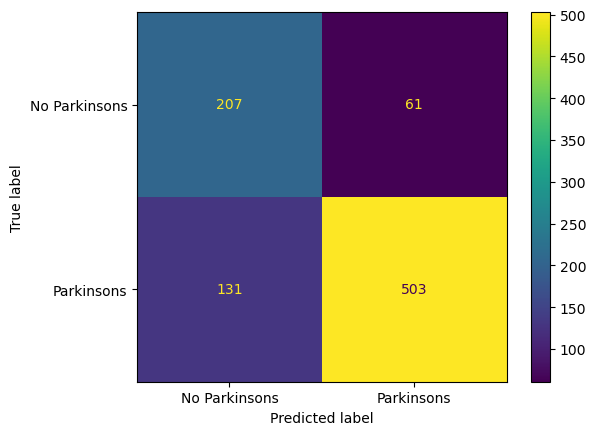

In [39]:
mat_display = ConfusionMatrixDisplay(confusion_matrix = mat, display_labels= ["No Parkinsons","Parkinsons"])
mat_display.plot()

In [41]:
print(classification_report(Y_pred,Y_f))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68       268
           1       0.89      0.79      0.84       634

    accuracy                           0.79       902
   macro avg       0.75      0.78      0.76       902
weighted avg       0.81      0.79      0.79       902

